In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [141]:
#Loading in data:
data = pd.read_excel('ENB2012_data.xlsx')
preserved_data = data.copy() #Preserving the integrity of the original dataframe in case it is needed
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [143]:
#Before, we train-test split, we drop X6, X7, and X8. This prevents us from having to drop these columns twice
data = data.drop(['X6','X7','X8'],axis=1)

#We also do one-hot-encoding before train-test splitting the data
#Before one-hot-encoding, use pandas mapping tool to make 7 into 0's and 3.5 into 1's
mapper = {7:0,3.5:1}
data.X5 = data.X5.map(mapper)

#Using one hot encoder
from sklearn.preprocessing import OneHotEncoder
x = data['X5'].values
enc = OneHotEncoder()
x = enc.fit_transform(x.reshape(-1,1)).toarray()

#Adding new columns with the categorized inputs
for i,cat in enumerate(['Entry is 7','Entry is 3.5']):
    data[cat] = x[:,i]

#We can drop X5 now that the one-hot-encoding is finished
data = data.drop(['X5'],axis=1)

In [144]:
#Train-test splitting the data with a ratio of 20%
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

#Reset the index of training and testing data
train = train.reset_index(drop=True)
train_preserved = train.copy()
test = test.reset_index(drop=True)
test_preserved = test.copy()

In [145]:
#First, we do the regression for Y1. We first remove the y2 data:
train = train.drop(['Y2'],axis=1)
test = test.drop(['Y2'],axis=1)


ytrain = train.pop('Y1')
xtrain = train
ytest = test.pop('Y1')
xtest = test

#We then scale the x data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [146]:
#We construct and loop through the three regressors for the Y1 regression case
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
dtr = DecisionTreeRegressor(max_depth = 2) #Setting max_depth should help prevent overfitting
gbr = GradientBoostingRegressor()
lin_reg = LinearRegression()

y1_df = pd.DataFrame()
y1_df.index = ['Training MSE','Testing MSE']

from sklearn.metrics import mean_squared_error

for i, reg in enumerate([dtr,gbr,lin_reg]):
    
    #Train each regressor
    reg.fit(xtrain_scaled, ytrain)
    
    #Finding training MSEs
    ytrain_predicted = reg.predict(xtrain_scaled)
    train_mse = mean_squared_error(ytrain, ytrain_predicted)

    #Finding testing MSEs
    ytest_predicted = reg.predict(xtest_scaled)
    test_mse = mean_squared_error(ytest, ytest_predicted)

    #Adding the results to the results dataframe
    y1_df[f'{reg}'] = [train_mse,test_mse]
    
y1_df

,DecisionTreeRegressor(max_depth=2),GradientBoostingRegressor(),LinearRegression()
Training MSE,11.587087,9.337533,16.115195
Testing MSE,61.091065,14.297584,16.282122


In [147]:
#Next, we do the regression for Y2 with the train_preserved and test_preserved data
train = train_preserved.drop(['Y1'],axis=1)
test = test_preserved.drop(['Y1'],axis=1)


ytrain = train.pop('Y2')
xtrain = train
ytest = test.pop('Y2')
xtest = test

#We then scale the x data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [148]:
#We construct and loop through the three regressors for the Y2 regression case
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #This is the linear model
dtr = DecisionTreeRegressor(max_depth = 2) #Setting max_depth should help prevent overfitting
gbr = GradientBoostingRegressor()
lin_reg = LinearRegression()

y2_df = pd.DataFrame()
y2_df.index = ['Training MSE','Testing MSE']

from sklearn.metrics import mean_squared_error

for i, reg in enumerate([dtr,gbr,lin_reg]):
    
    #Train each regressor
    reg.fit(xtrain_scaled, ytrain)
    
    #Finding training MSEs
    ytrain_predicted = reg.predict(xtrain_scaled)
    train_mse = mean_squared_error(ytrain, ytrain_predicted)

    #Finding testing MSEs
    ytest_predicted = reg.predict(xtest_scaled)
    test_mse = mean_squared_error(ytest, ytest_predicted)

    #Adding the results to the results dataframe
    y2_df[f'{reg}'] = [train_mse,test_mse]
    
y2_df

,DecisionTreeRegressor(max_depth=2),GradientBoostingRegressor(),LinearRegression()
Training MSE,10.375101,6.965699,14.207184
Testing MSE,50.865663,14.925454,14.267862


Text(0.5, 0, 'Method')

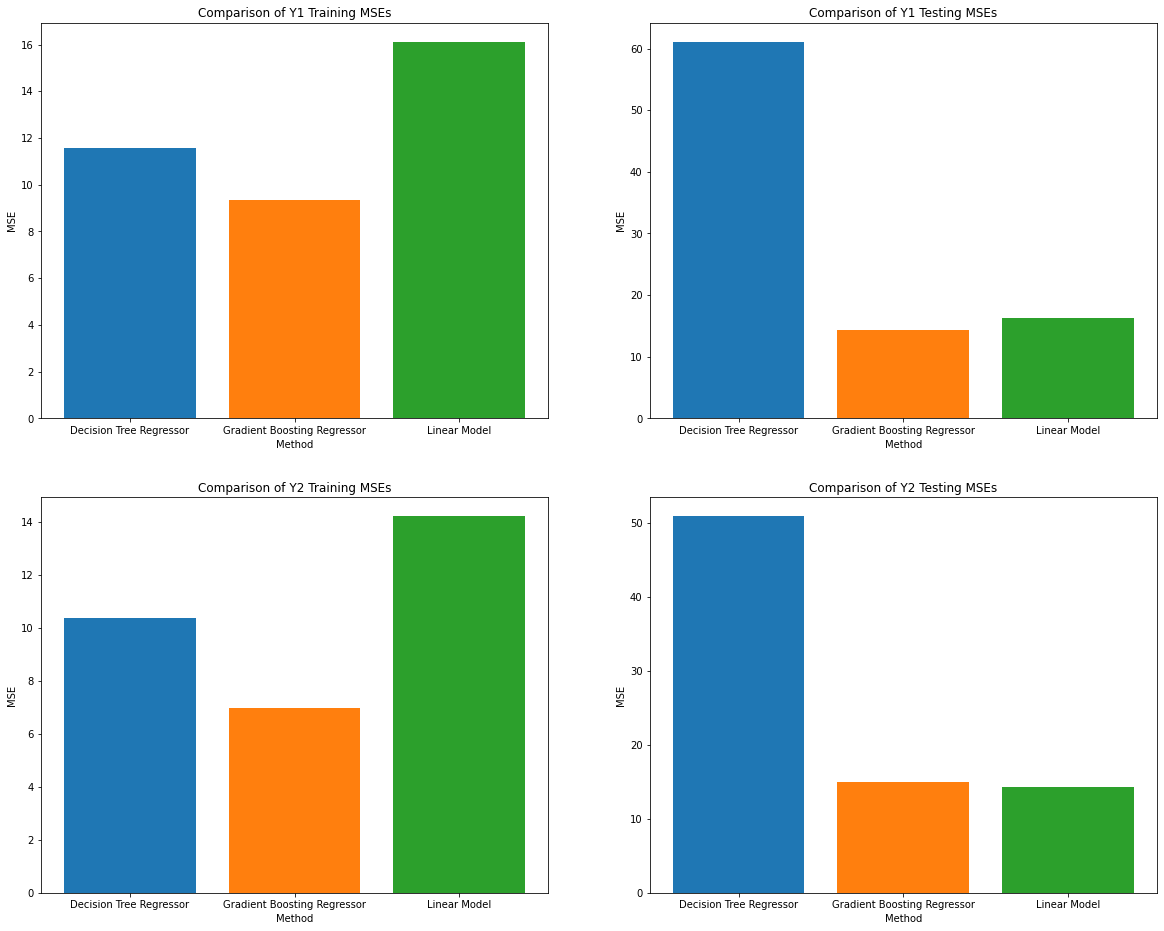

In [149]:
#Now with the two dataframes of errors, we can construct a subplot visualization of the training and testing errors (MSEs)
#Associated with the Y1 and Y2 predictions
plt.figure(figsize=(20,16))

plt.subplot(221)

plt.bar('Decision Tree Regressor',y1_df.iloc[0,0])
plt.bar('Gradient Boosting Regressor',y1_df.iloc[0,1])
plt.bar('Linear Model',y1_df.iloc[0,2])
plt.title('Comparison of Y1 Training MSEs')
plt.ylabel('MSE')
plt.xlabel('Method')

plt.subplot(222)

plt.bar('Decision Tree Regressor',y1_df.iloc[1,0])
plt.bar('Gradient Boosting Regressor',y1_df.iloc[1,1])
plt.bar('Linear Model',y1_df.iloc[1,2])
plt.title('Comparison of Y1 Testing MSEs')
plt.ylabel('MSE')
plt.xlabel('Method')

plt.subplot(223)

plt.bar('Decision Tree Regressor',y2_df.iloc[0,0])
plt.bar('Gradient Boosting Regressor',y2_df.iloc[0,1])
plt.bar('Linear Model',y2_df.iloc[0,2])
plt.title('Comparison of Y2 Training MSEs')
plt.ylabel('MSE')
plt.xlabel('Method')

plt.subplot(224)

plt.bar('Decision Tree Regressor',y2_df.iloc[1,0])
plt.bar('Gradient Boosting Regressor',y2_df.iloc[1,1])
plt.bar('Linear Model',y2_df.iloc[1,2])
plt.title('Comparison of Y2 Testing MSEs')
plt.ylabel('MSE')
plt.xlabel('Method')

In [150]:
#These results show us that for the Y1 regression, the gradient boosting regressor generalizes the best and also has
#the lowest training MSE. The Y2 regression shows similar results, with the gradient boosting regressor generalizing
#best yet again.

#Similar patterns also show with the other two regressors. For both the Y1 and Y2 regressions, the linear model performs
#the worst on the training data, but generalizes better than the decision tree regressor on the testing data. 
#As far as generalization is concerned, the linear model is similarly good to the gradient boosting regressor, but the 
#decision tree regressor is far worse.